## Aesthetics

- We'll focus on how to use data visualization to communicate insights and tell stories.
- We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand.

### Introduction to the Data

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

__Source:__ Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available <a href="http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv">here</a>

The dataset was compiled to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

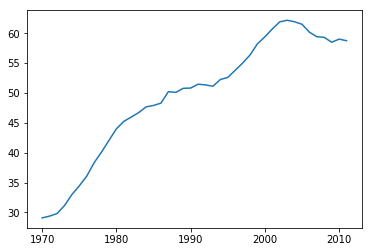

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

x_values = women_degrees['Year']
y_values = women_degrees['Biology']

plt.plot(x_values, y_values)
plt.show()